In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

# FIXED PERCENTAGE

In [36]:
def fixed_percentage(
        datasets=['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist'],
        models=['ae', 'tae', 'convae', 'convtae', 'umap'],
        markers = ['d', 's', 'p', 'h', 'o'],
        percentages=[25, 50, 75, 100, 200],
        colors = ['blue', 'orange', 'lightgreen', 'darkgreen', 'purple'],
        hatches = ['//', '\\\\', '||', '--', '..'],
        y_lim = [0, 1],
        last_to_=250
        ):
    """
    Plots the best accuracy for each model and dataset for a fixed percentage of the dataset.
    """
    plt.rcParams.update({'font.size': 22})
    for dataset in datasets:
        with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
            no_reducer_score = yaml.load(f, Loader=yaml.FullLoader)
            no_reducer_score = no_reducer_score['score']
        
        fig = plt.figure(figsize=(20, 10))
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        gs = fig.add_gridspec(ncols=len(models), wspace=0)
        axs = gs.subplots(sharex=False, sharey=True)
        axs[0].set_ylabel(f'Best accuracy')
        axs[0].set_ylim(y_lim)
        # fig, axs = plt.subplots(1, len(models), figsize=(15, 8))
        # plt.suptitle(f'Summary boxplots on {dataset}')
        plt.suptitle(f'Accuracy boxplots over models')
        
        for m_index, model in enumerate(models):
            axs[m_index].plot([-0.5, len(percentages)-0.5], [no_reducer_score, no_reducer_score], color='red', linewidth=2, label='No reducer')
            ticks = []
            ticks_labels = []
            for p_index, percentage in enumerate(percentages):
                experiment_name = f'P10_{model}_{dataset}_p{percentage}'
                if model == 'umap':
                    experiment_name = experiment_name[4:]
                try:
                    data = pd.read_csv(f'../experiments/{experiment_name}/data.csv')
                    data = data.loc[data['score'] > 0].iloc[:]
                    
                except:
                    data = pd.DataFrame({'Unnamed: 0': [], 'score': []})
                ticks.append(p_index)
                ticks_labels.append(f'{percentage}')
                axs[m_index].boxplot(
                    data['score'],
                    widths = 0.6,
                    positions=[p_index],
                    patch_artist=True,
                    boxprops = dict(facecolor = colors[m_index], hatch=hatches[m_index]),
                )
            axs[m_index].set_xticks(ticks, ticks_labels)
            axs[m_index].set_xlabel(f'{model}')
            axs[m_index].grid()
            axs[m_index].set_xlim([-0.5, len(percentages)-0.5])
        # plt.show()
        plt.savefig(f'summary-boxplot-{dataset}.png', transparent=True)

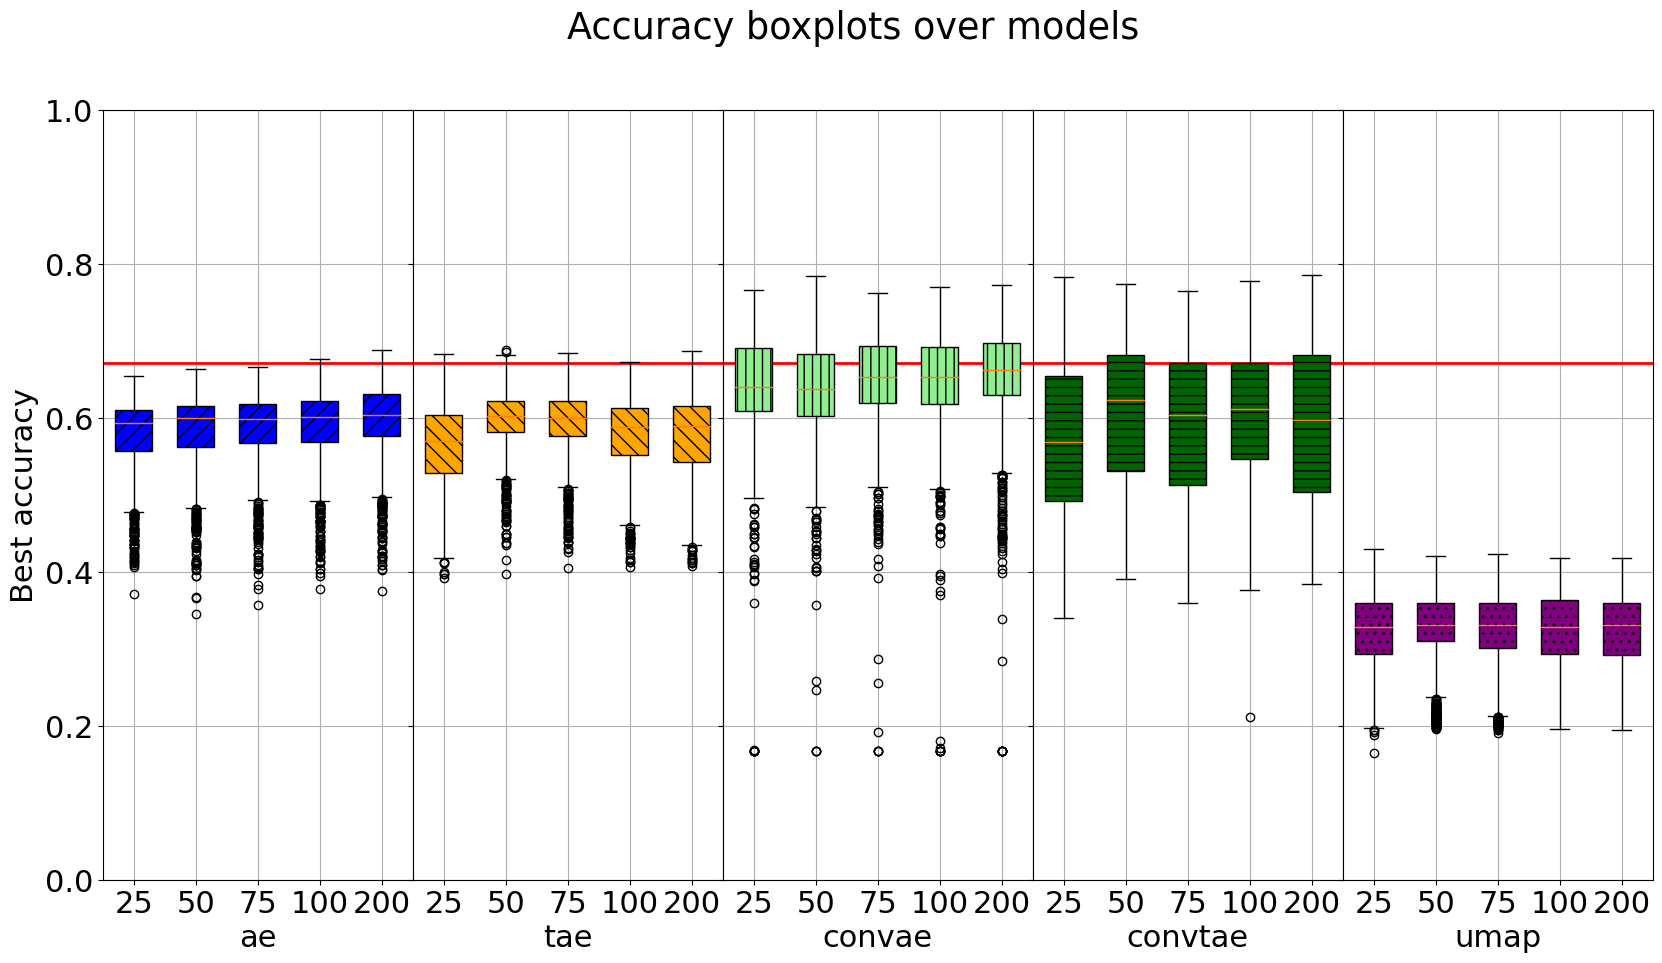

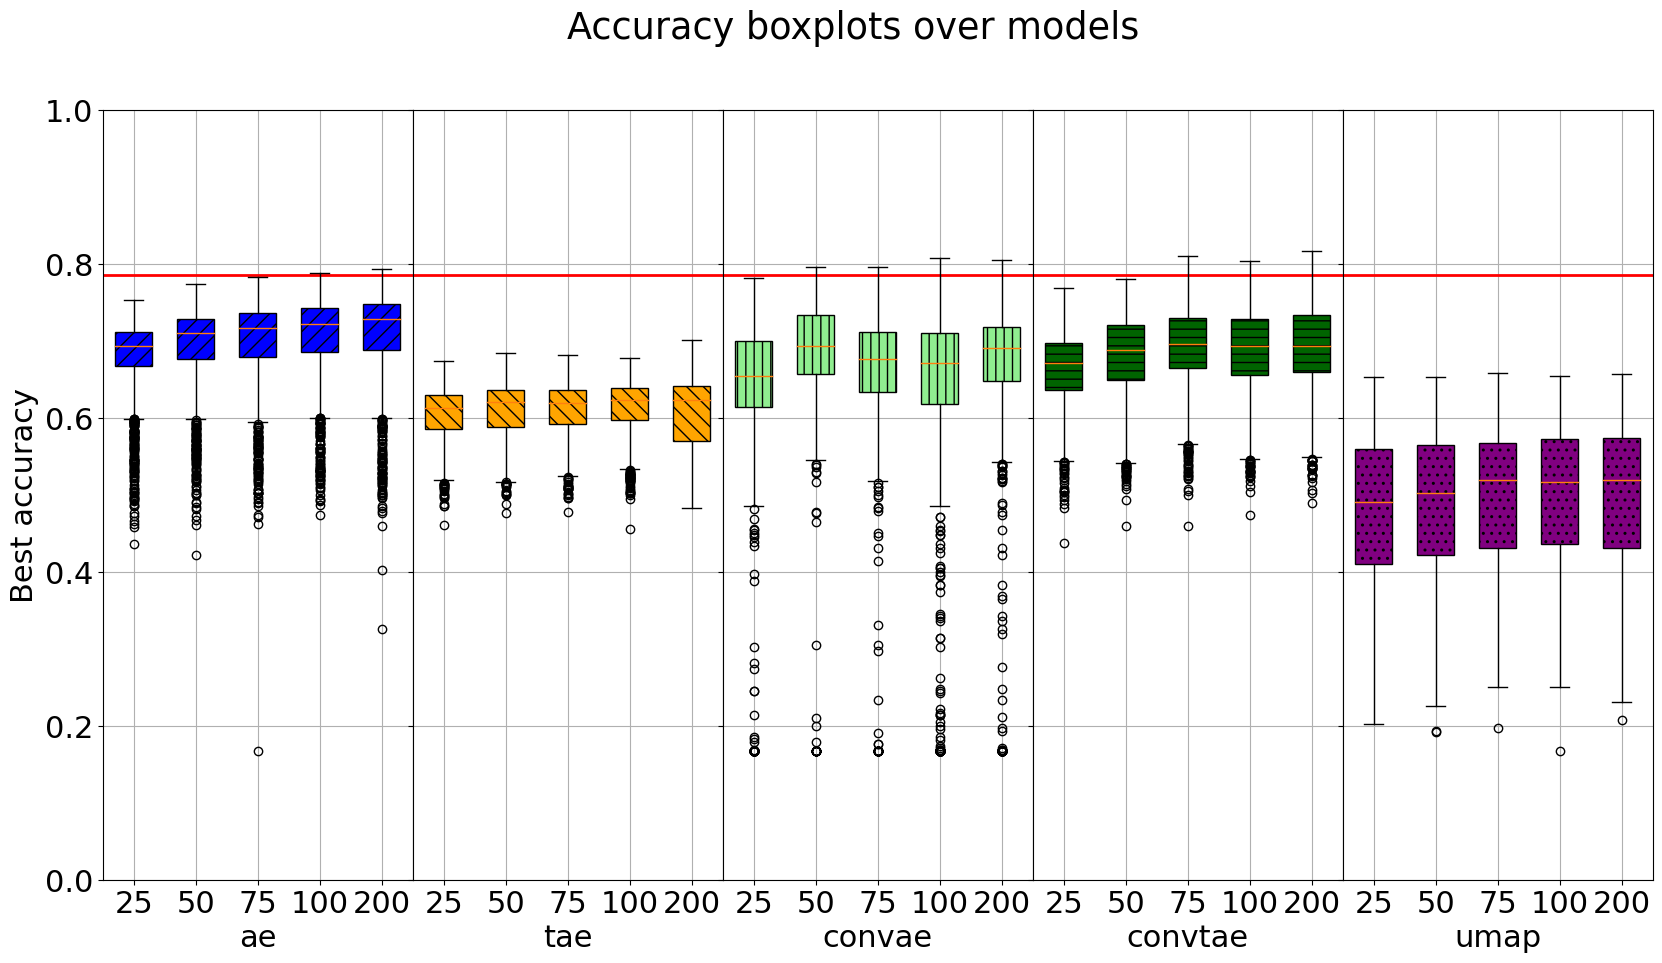

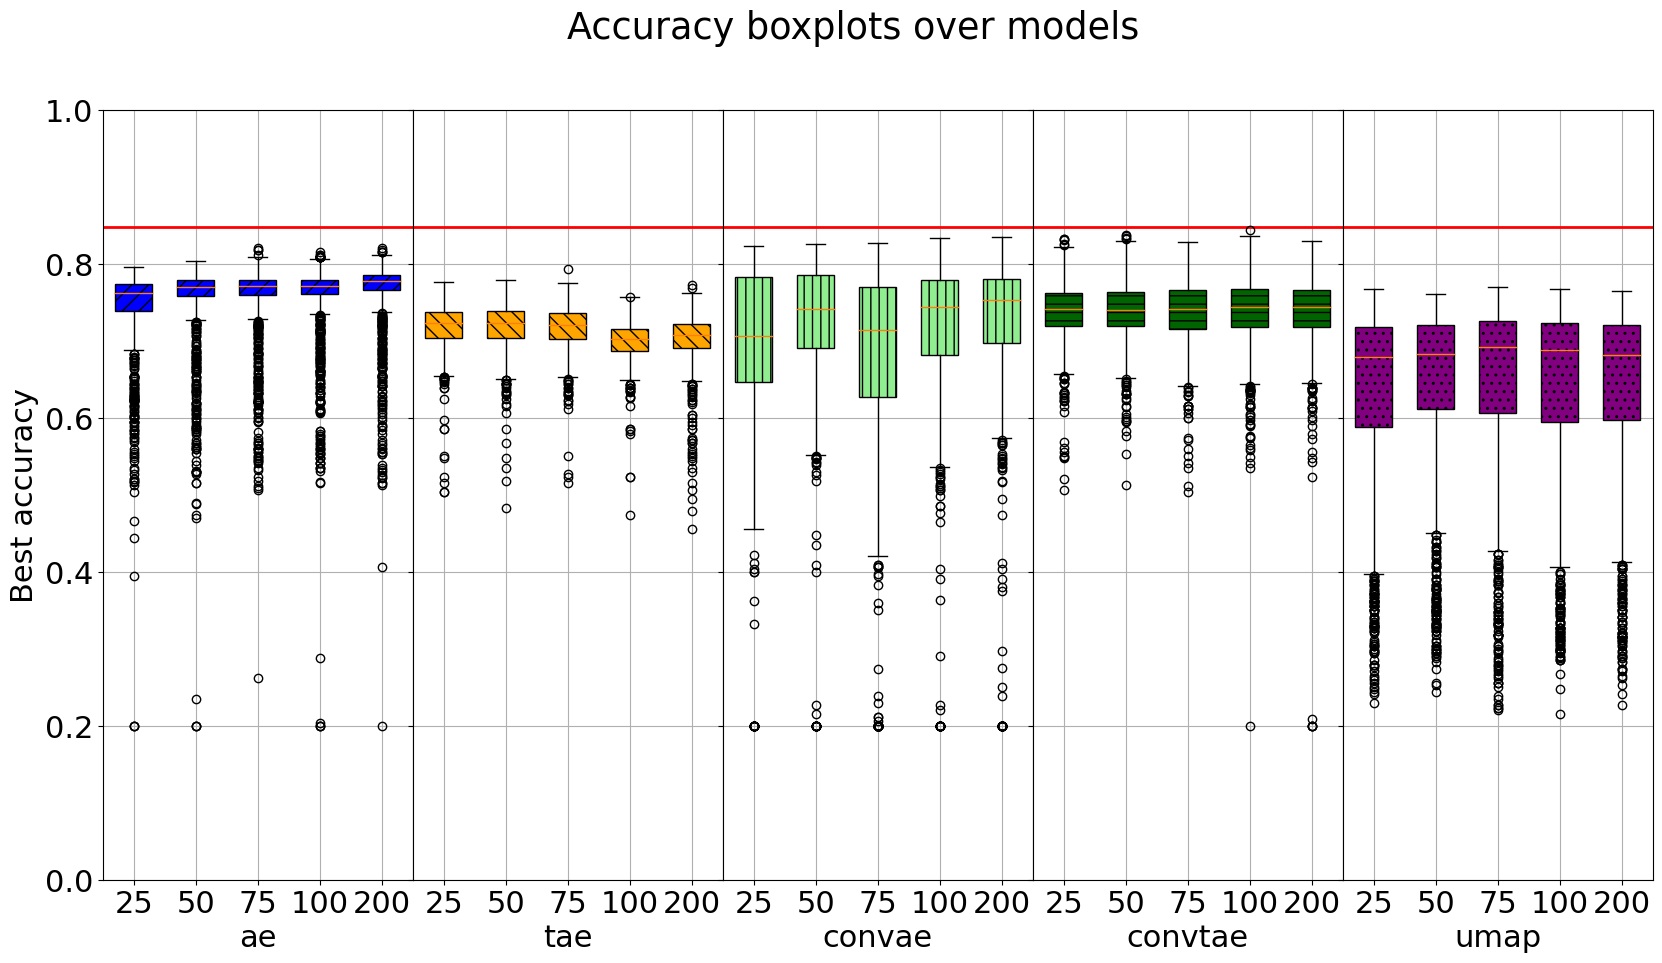

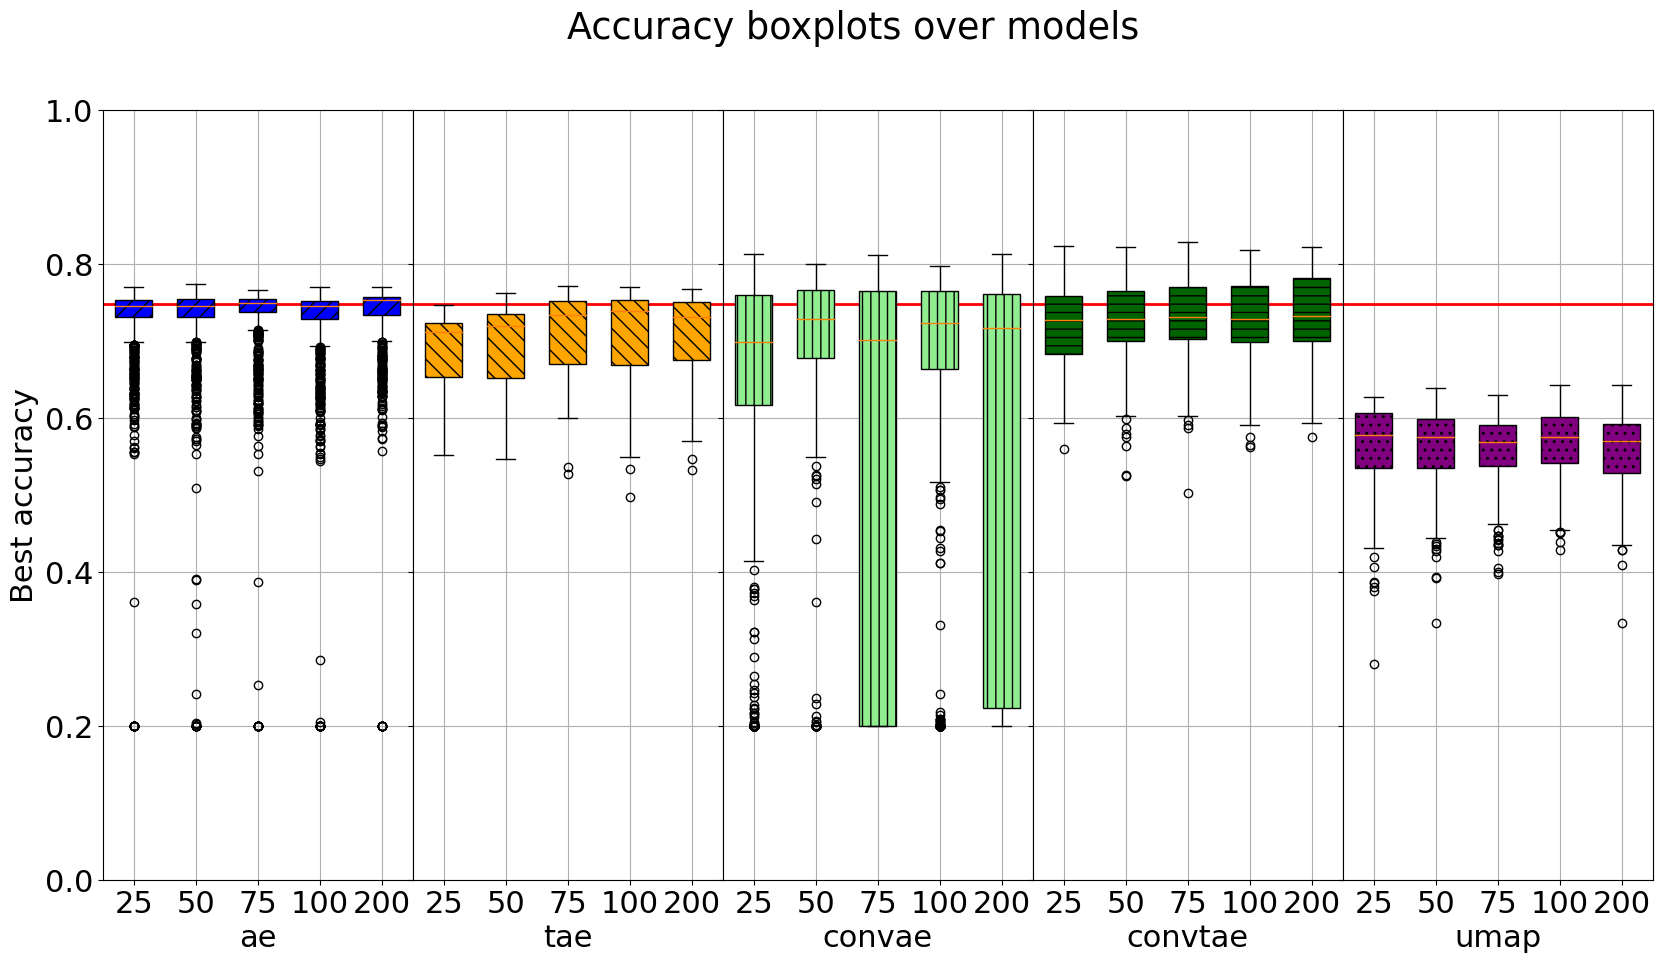

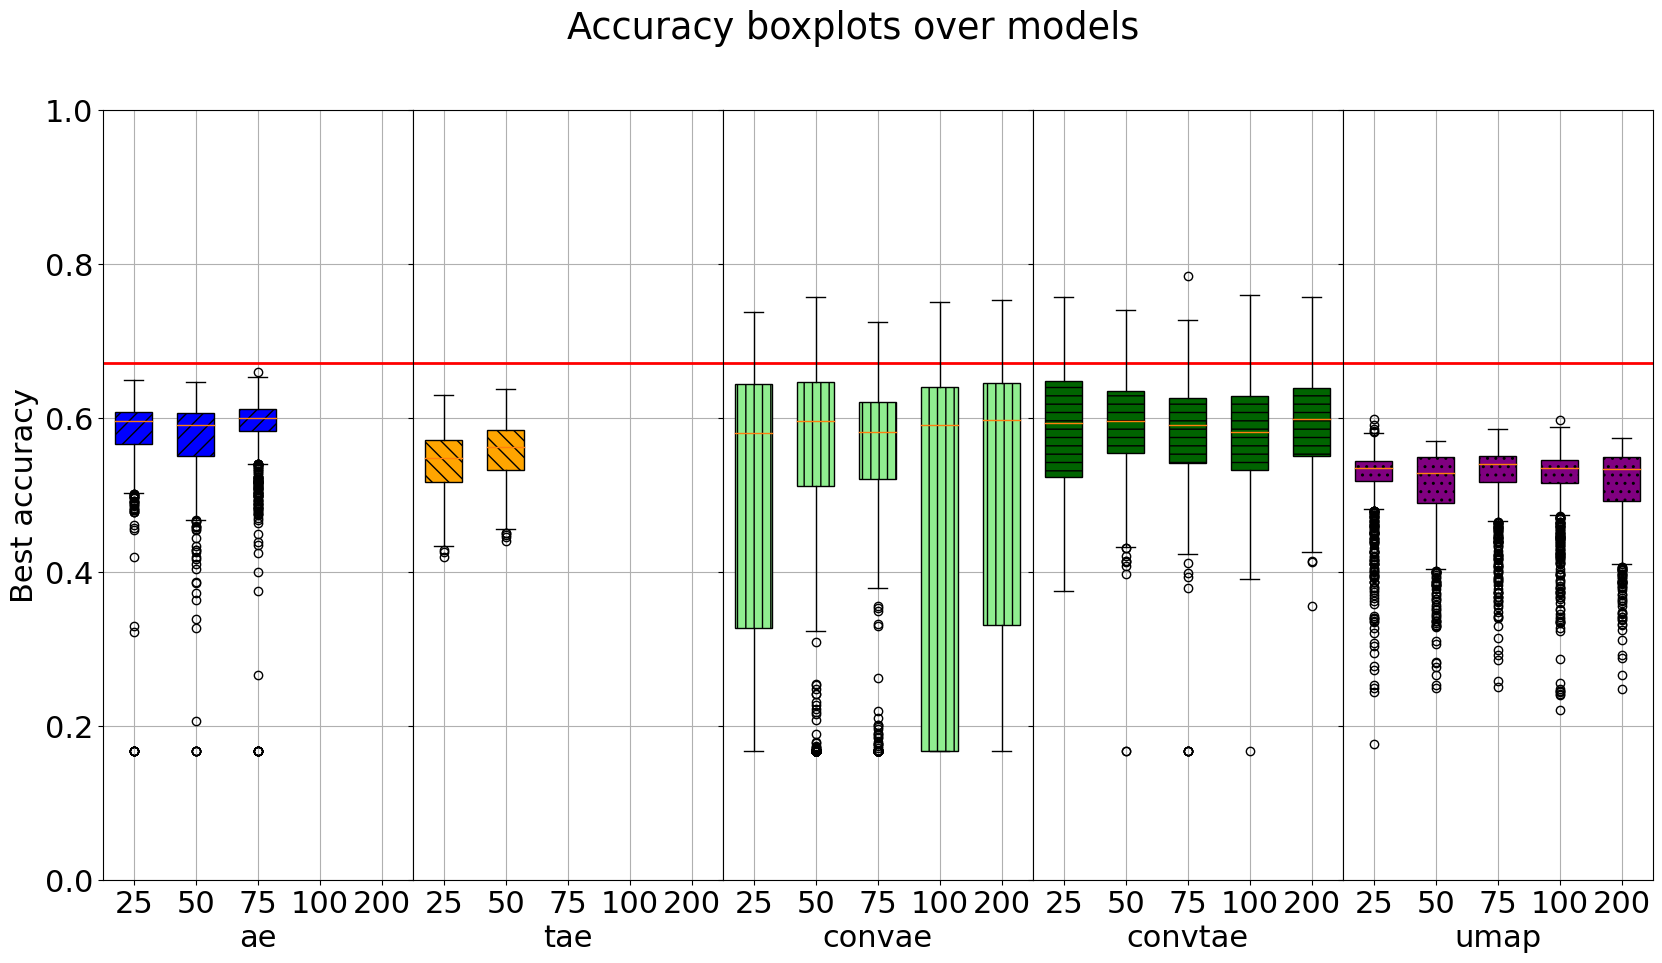

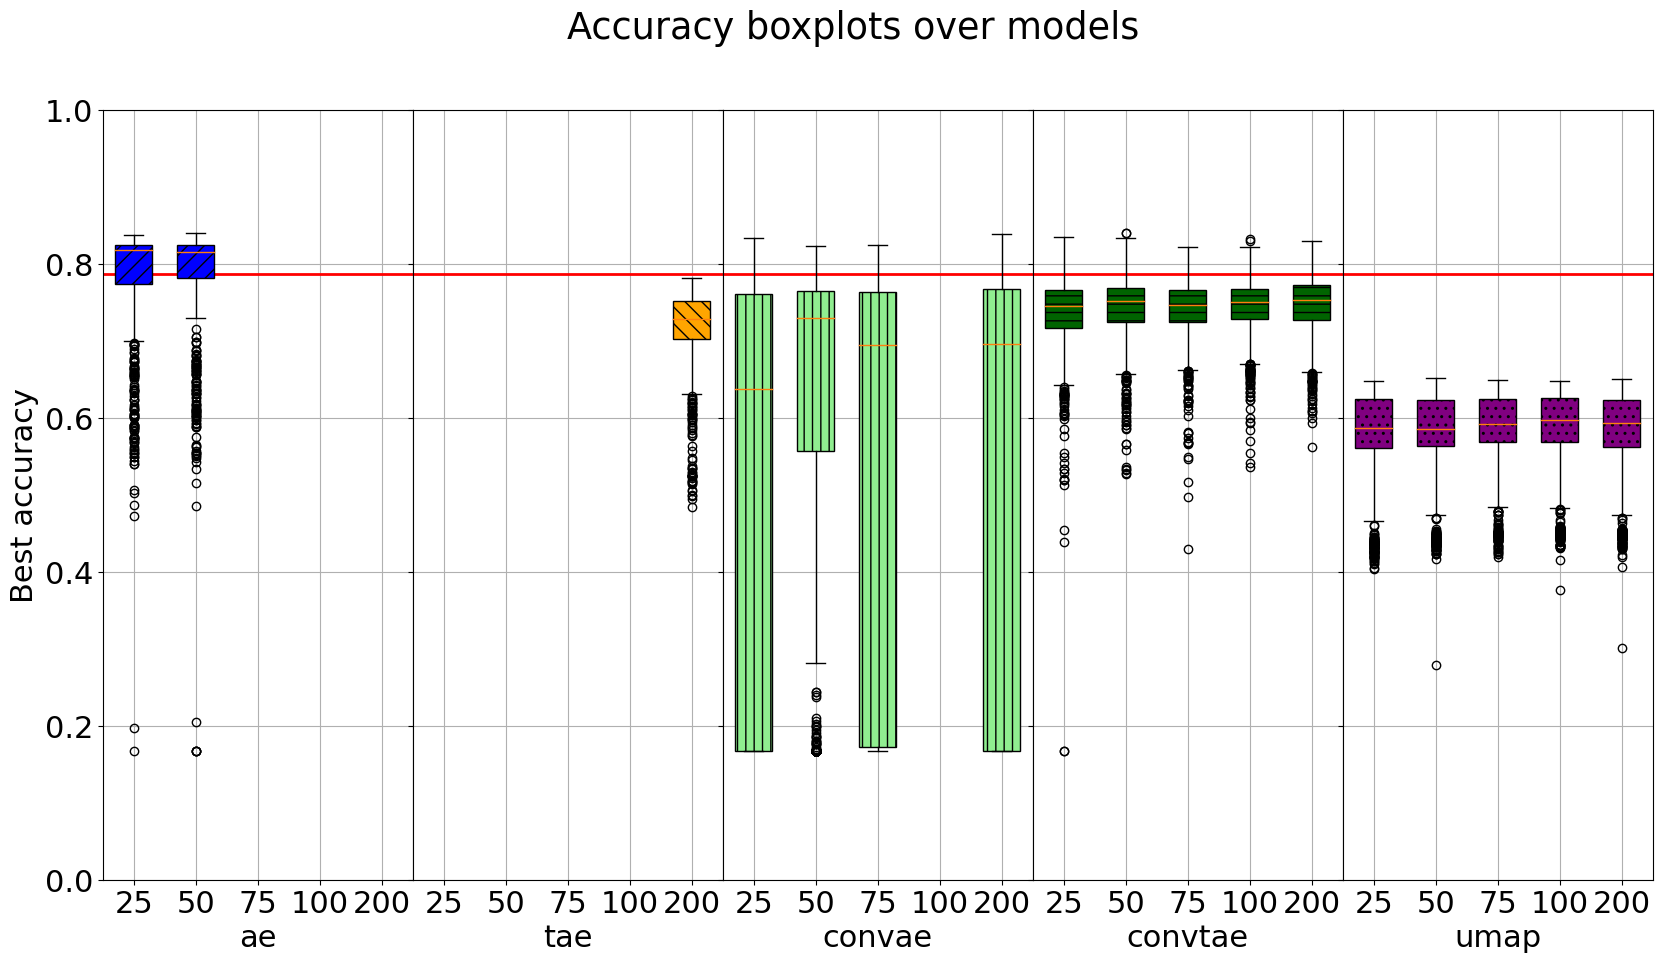

In [37]:
fixed_percentage(datasets=['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist'])